In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
seeds = np.arange(100)
random_state=42
n_features = 3

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[1]]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [6]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [7]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [8]:
all_scores = []
selected_feat = []

In [9]:
i = 0
for seed in seeds:
    i += 1
    rng = np.random.default_rng(seed=seed)
    for run in range(1):
        perm = rng.permutation(len(X_train_sc.columns))
        X_perm = X_train_sc[X_train_sc.columns[perm]]
        sfm = SelectFromModel(ElasticNet(random_state=seed, fit_intercept=False, selection='random', positive=False,
                                        l1_ratio=1),
                              threshold=-np.inf,
                              max_features=n_features)
        _ = sfm.fit(X_perm, np.ravel(y_train_sc))
        _, scores_sorted = zip(*sorted(zip(X_perm.columns, sfm.estimator_.coef_), reverse=True))
        all_scores.append(scores_sorted)
        selected_feat.append(X_perm.columns[(sfm.get_support())])
    #print('{}% done'.format(i*100//len(seeds)))

In [10]:
cls, scores_sorted = zip(*sorted(zip(X_perm.columns, sfm.estimator_.coef_), reverse=True))

In [11]:
scores = pd.DataFrame(all_scores)
scores.columns = cls

In [12]:
avgs = scores.mean(axis=0)
avgs

rGes          0.0
piPC05        0.0
piPC04        0.0
piPC03        0.0
nTriazoles    0.0
             ... 
AMW           0.0
ALOGP2        0.0
ALOGP         0.0
AECC          0.0
AAC           0.0
Length: 1260, dtype: float64

In [13]:
s = avgs.sort_values(ascending=False)
s.index[:63]

Index(['rGes', 'GATS8m', 'GATS6m', 'GATS6p', 'GATS6v', 'GATS7p', 'GATS7s',
       'GATS7v', 'GATS8i', 'GATS8s', 'GATS5s', 'GATS8v', 'GGI2', 'GGI3',
       'GGI4', 'GGI5', 'GGI6', 'GGI7', 'GATS5v', 'GATS5p', 'GATS1v', 'GATS3s',
       'GATS2i', 'GATS2m', 'GATS2p', 'GATS2s', 'GATS2v', 'GATS3e', 'GATS3i',
       'GATS3v', 'GATS5m', 'GATS4i', 'GATS4m', 'GATS4p', 'GATS4s', 'GATS4v',
       'GATS5e', 'GATS5i', 'GMTI', 'GNar', 'Ges', 'H3v', 'H2p', 'H2s', 'H2v',
       'H3m', 'H3p', 'H3s', 'H3u', 'H4i', 'Gm', 'H4s', 'H4v', 'H5p', 'H5s',
       'H5v', 'H6p', 'H6s', 'H2m', 'H2e', 'H1v', 'H1s', 'H%'],
      dtype='object')

In [14]:
avgs[s.index[62]], s.index[62]

(0.0, 'H%')

In [15]:
selected_feat

[Index(['RDF040v', 'Mor06s', 'GATS8i'], dtype='object'),
 Index(['HATS4m', 'O-056', 'Mor09s'], dtype='object'),
 Index(['CATS2D_05_AL', 'Chi_Dz(m)', 'JGI2'], dtype='object'),
 Index(['GATS2s', 'GATS8m', 'Eig13_AEA(bo)'], dtype='object'),
 Index(['N%', 'CATS2D_06_DP', 'CMBL'], dtype='object'),
 Index(['H0m', 'TI2_L', 'TDB01u'], dtype='object'),
 Index(['C-040', 'Mor25m', 'MATS4s'], dtype='object'),
 Index(['SPAN', 'CATS2D_03_DP', 'Mor08p'], dtype='object'),
 Index(['H-046', 'F06[C-O]', 'TDB05v'], dtype='object'),
 Index(['CATS3D_04_DN', 'nCrt', 'nCsp2'], dtype='object'),
 Index(['Mor11s', 'B05[C-N]', 'B05[C-C]'], dtype='object'),
 Index(['Eta_C_A', 'ATS8i', 'Chi1_EA(ed)'], dtype='object'),
 Index(['J_D', 'CATS3D_07_DN', 'CATS3D_02_DA'], dtype='object'),
 Index(['SM2_Dz(p)', 'SpMin3_Bh(e)', 'P_VSA_LogP_4'], dtype='object'),
 Index(['RDF035v', 'nArNH2', 'MEcc'], dtype='object'),
 Index(['MEcc', 'H6s', 'HATS5s'], dtype='object'),
 Index(['Eta_D_beta', 'R7e+', 'SpMaxA_AEA(ed)'], dtype='obje

In [16]:
scores

,rGes,piPC05,piPC04,piPC03,nTriazoles,nTA,nROR,nROH,nRNR2,nRNHR,...,ATS4e,ATS3v,ATS3s,ATS2s,ARR,AMW,ALOGP2,ALOGP,AECC,AAC
0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
1,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
96,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
97,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


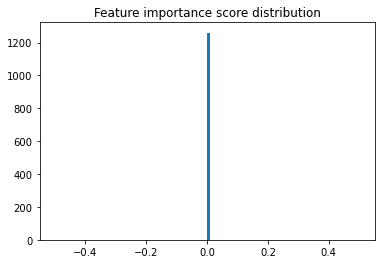

In [17]:
t63 = avgs[s.index[62]]
fig, ax = plt.subplots()
plt.hist(np.array(scores_sorted),bins=100)
#ax.plot([t63, t63], [0, 8], 'r--')
#ax.annotate('top 63 features reaching score of >={:.2f}'.format(t63), xy=(t63+1, 8), xytext=(t63+1, 8))
plt.title('Feature importance score distribution')
#plt.xlabel('Feature importance score')
#plt.ylabel('Number of features')
#plt.ylim(top=10)
plt.show()

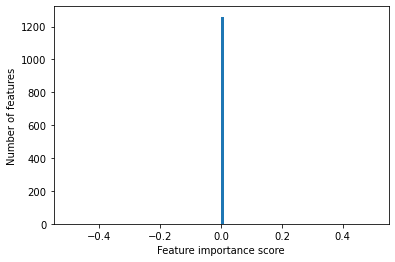

In [18]:
fig, ax = plt.subplots()
plt.hist(np.array(scores_sorted),bins=100)
#plt.title('Feature importance score distribution')
plt.xlabel('Feature importance score')
plt.ylabel('Number of features')
plt.show()

In [24]:
elNet = ElasticNet(random_state=random_state, fit_intercept=False, selection='random',
                  l1_ratio=1).fit(X_train_sc, np.ravel(y_train_sc))

In [25]:
np.min(elNet.coef_), np.max(elNet.coef_)

(0.0, 0.0)